## Import Necessary Packages

In [2]:
import os
import torch
import pickle
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import proplot as pplt
import scipy.stats as stats
pplt.rc['figure.dpi'] = 100
warnings.filterwarnings('ignore')

## Load Data

In [3]:
def load(varname):
    data = xr.open_dataarray(f'/global/cfs/cdirs/m4334/sferrett/monsoon-sr/data/interim/{varname}.nc')
    return data.load()

In [4]:
pr = load('pr')
bl = load('bl')

## Plot Distributions

In [5]:
x    = bl.values.flatten()
y    = pr.values.flatten()
bins = 50

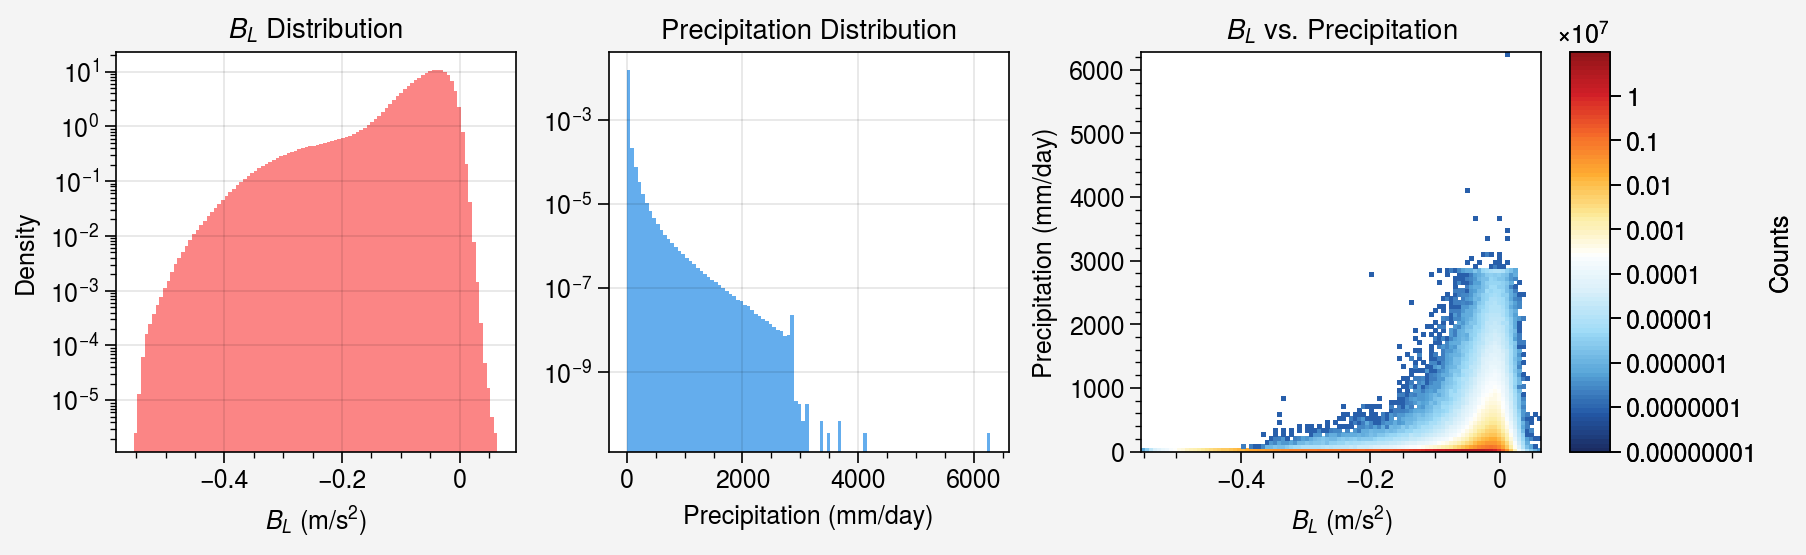

In [14]:
fig,axs = pplt.subplots(nrows=1,ncols=3,refwidth=2,share=False)
axs[0].format(title='$\mathit{B_L}$ Distribution',xlabel='$\mathit{B_L}$ (m/s$^2$)',ylabel='Density',yscale='log',yformatter='log')
axs[1].format(title='Precipitation Distribution',xlabel='Precipitation (mm/day)',yscale='log',yformatter='log')
axs[2].format(title='$\mathit{B_L}$ vs. Precipitation',xlabel='$\mathit{B_L}$ (m/s$^2$)',ylabel='Precipitation (mm/day)')
axs[0].hist(x,bins=bins,density=True,color='red6',alpha=0.7)
axs[1].hist(y,bins=bins,density=True,color='blue6',alpha=0.7)
hist,xedges,yedges = np.histogram2d(x,y,bins=(bins,bins))
hist = np.ma.masked_where(hist==0,hist)
mesh = axs[2].pcolormesh(xedges,yedges,hist.T,cmap='ColdHot',norm='log',levels=100)
axs[2].colorbar(mesh,label='Counts',ticks=[0.1,1,10,100,1000,10000,100000,1000000,10000000])
pplt.show()

## Plot Analytical Baselines

In [15]:
with open(f'/global/cfs/cdirs/m4334/sferrett/monsoon-sr/data/results/baseline_results.pkl','rb') as file:
    lrresults = pickle.load(file)

with open(f'/global/cfs/cdirs/m4334/sferrett/monsoon-sr/data/results/baseline_results_NEW.pkl','rb') as file:
    hrresults = pickle.load(file)

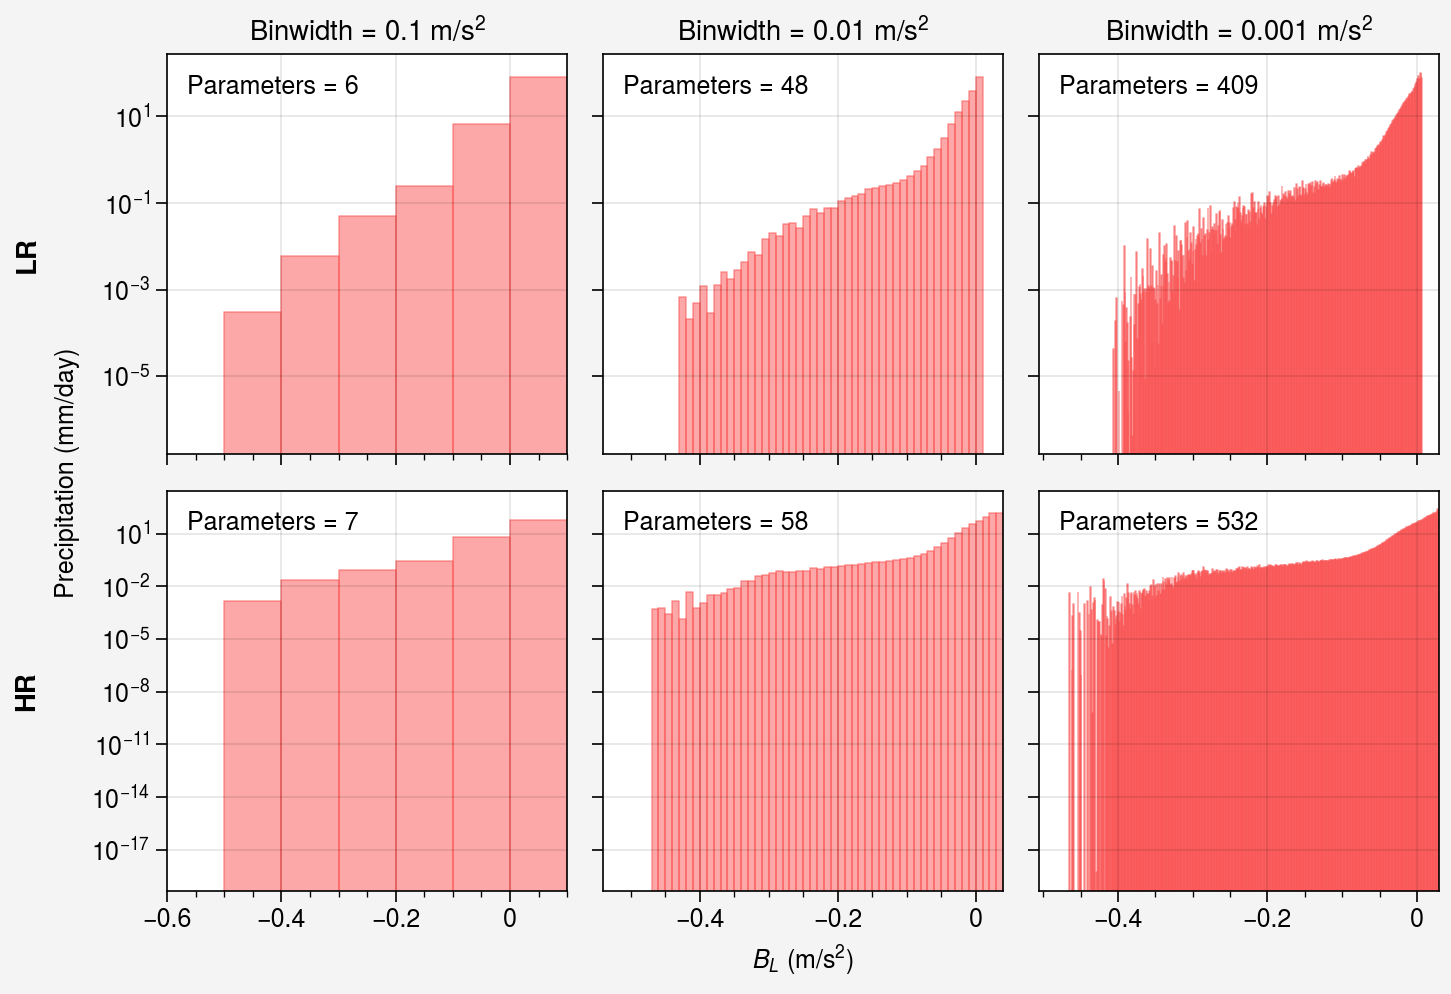

In [17]:
fig,axs = pplt.subplots(nrows=2,ncols=3,refwidth=2,share=True)
axs.format(rowlabels=['LR','HR'],xlabel='$\mathit{B_L}$ (m/s$^2$)',xticks=0.2,
           ylabel='Precipitation (mm/day)',yscale='log',yformatter='log')
allresults = list(lrresults.items())+list(hrresults.items())
for i,(modelname,results) in enumerate(allresults):
    ax = axs[i]
    if i<3: 
        ax.format(title=results['description'])
    for bincenter,meanvalue in zip(results['bincenters'],results['binmeans']):
        if not np.isnan(meanvalue):
            hw = results['binwidth']/2
            ax.fill_between([bincenter-hw,bincenter+hw],[0, 0],[meanvalue,meanvalue],color='red6',edgecolor='red6',alpha=0.5)
    ax.text(0.05,0.95,f'Parameters = {results["nparams"]}',transform=ax.transAxes,va='top')
pplt.show()